In [3]:
import numpy as np
import pandas as pd
import pymysql.cursors
import matplotlib 
import seaborn as sns
import datetime
sns.set(rc={'figure.figsize':(10,5)})




In [43]:



lis = []
lis2= []
# Connect to the database
conn = pymysql.connect(
    host='learningcomputerscience.com',port=3306, user='test_remote', password='test_remote!',database='9_8_BT', charset='utf8mb4',cursorclass=pymysql.cursors.DictCursor)

# Create a cursor object
cursor = conn.cursor()

# Execute a SELECT query
cursor.execute("SELECT * FROM recipt")
results = cursor.fetchall()
for result in results:
    # print(result)
    lis.append(result)
total = pd.DataFrame.from_dict(lis)
print(total)

cursor.execute("SELECT * FROM items")
results = cursor.fetchall()
for result in results:
    # print(result)
    lis2.append(result)
items = pd.DataFrame.from_dict(lis2)
items.set_index("name")
print(items)

# Close the cursor and connection
cursor.close()
conn.close()

/Users/23behmen_t/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  app.launch_new_instance()


ValueError: No axis named item for object type DataFrame

,ID,price_sold,type,og_price
item,,,,
Oshee Musli Bar Cranberry Pink 40g,91,5.0,snacks,2.39
Goldfish,90,30.0,snacks,20.00
Schweppes Citrus Mix 0.85L,89,8.0,drinks,6.09
Schweppes Citrus 0.33 L,88,6.0,drinks,3.29
Schweppes Tonic 0.85L,87,8.0,drinks,6.09


In [44]:
totalrev=0
for tr in total['revenue']:
    totalrev = totalrev +tr
print(totalrev)

4467.0


In [45]:
def findrev(x):
    for index, row in items.iterrows():
        if x == row['name']:
            c = row['price_sold']
    return c

for index, row in total.iterrows():
    x = row['item']
    if row['quantity_bought'] == 0:
        total.loc[index, 'quantity_bought'] = 1
    if row['revenue'] == 0:
        total.loc[index, 'revenue'] = findrev(x)
total[total['revenue']==0].head()

,ID,date,item,quantity_bought,time,revenue


In [46]:
def findprofit(a,x,b):
    profit = 0
    for index, row in items.iterrows():
        if x == row['name']:
            c = row['og_price']
            profit = (a - (b*c))
    return profit

totalprofit = 0
t = total
t['profit'] = 0
for index, row in t.iterrows():
    x = row['item']
    a = row['revenue']
    b = row['quantity_bought']
    g = findprofit(a,x,b)
    t.loc[index, 'profit'] = g
    totalprofit += g
t.head(5)



,ID,date,item,quantity_bought,time,revenue,profit
0,8,"Wednesday, January 25, 2023",Hortex Blackberry 300ml (Czarna Porzeczka),1.0,12 : 3,4.0,2.05
1,9,"Wednesday, January 25, 2023",Nestle Whole Grain with Chocolate 23g,5.0,12 : 5,20.0,13.05
2,10,"Wednesday, January 25, 2023",Oshee Vitamin Mineral Dragonfruit 555ml,1.0,12 : 15,6.0,3.35
3,11,"Wednesday, January 25, 2023",Lajkonik Pretzel Crackers,1.0,12 : 15,5.0,1.21
4,12,"Wednesday, January 25, 2023",Ginger shot 50g,2.0,12 : 16,24.0,6.82


In [47]:
def findtype(x,y):
    for index, row in y.iterrows():
        if x == row['name']:
            c = row['type']
    return c
t['type'] = "null"
for index, row in t.iterrows():
    x = row['item']
    t.loc[index, 'type'] = findtype(x,items)

t.head()

,ID,date,item,quantity_bought,time,revenue,profit,type
0,8,"Wednesday, January 25, 2023",Hortex Blackberry 300ml (Czarna Porzeczka),1.0,12 : 3,4.0,2.05,drinks
1,9,"Wednesday, January 25, 2023",Nestle Whole Grain with Chocolate 23g,5.0,12 : 5,20.0,13.05,snacks
2,10,"Wednesday, January 25, 2023",Oshee Vitamin Mineral Dragonfruit 555ml,1.0,12 : 15,6.0,3.35,drinks
3,11,"Wednesday, January 25, 2023",Lajkonik Pretzel Crackers,1.0,12 : 15,5.0,1.21,snacks
4,12,"Wednesday, January 25, 2023",Ginger shot 50g,2.0,12 : 16,24.0,6.82,drinks


In [48]:
itemxprofit = items.set_index("name")
itemxprofit['profit'] = 0
puprofit = 0

for index, row in itemxprofit.iterrows():
    x = index
    for index, row in t.iterrows():
        if x == row['item']:
            c = row['profit']
            puprofit += c
    itemxprofit.loc[x, 'profit'] = puprofit
    puprofit = 0
itemxprofit.head(10)

,id,price_sold,type,og_price,profit
name,,,,,
Still Water 500ml,2,2.5,drinks,1.05,26.10
Blue Ink Pen,4,1.0,utilities,0.58,0.00
Lajkonik Crackers,17,4.5,snacks,1.59,142.59
Lajkonik Junior Safari Crackers,18,5.0,snacks,3.59,40.89
Lajkonik Pretzel Crackers,24,5.0,snacks,3.79,1.21
Belvita Cookie,27,2.5,snacks,1.03,32.34
Scheweppes 850ml Bitter Lemon,35,10.0,drinks,4.91,18.54
Hortex Blackberry 300ml (Czarna Porzeczka),36,4.0,drinks,1.95,10.25
Hortex Multivitamin Juice 300ml,37,4.0,drinks,1.95,6.15


In [52]:

itemxprofit['bought'] = 0

for index, row in t.iterrows():
    x = row['item']
    c = row['quantity_bought']
    for index, row in itemxprofit.iterrows():
        if index == x:
            itemxprofit.at[index, 'bought'] += c

itemxprofit.head(70).sort_values(by = ['bought'], ascending=False)


,id,price_sold,type,og_price,profit,bought
name,,,,,,
Biscoff Biscuits,86,1.0,snacks,0.16,120.12,143.0
Oshee Vitamin Mineral Dragonfruit 555ml,46,6.0,drinks,2.65,318.25,95.0
POP N Chrup Snack Green Onion Green 35g,73,5.0,snacks,1.59,201.19,59.0
Oshee Vitamin Energy Zero Magnesium 250ml,45,4.5,drinks,2.53,98.50,50.0
Lajkonik Crackers,17,4.5,snacks,1.59,142.59,49.0
Nestle Whole Grain with Chocolate 23g,81,4.0,snacks,1.39,122.67,47.0
POP N CHRUP Snack Sea Salt Blue 35g,71,5.0,snacks,1.59,136.40,40.0
GO ON Protein Crisp/Caramel 50g,77,6.0,snacks,3.69,90.09,39.0
Oshee Vitamin Minerals Pink 0.25L,60,5.0,drinks,2.85,75.25,35.0


In [ ]:
itemxprofit[itemxprofit['bought'] > 5].head(30)

,ID,price_sold,type,og_price,profit,bought
item,,,,,,
Oshee Musli Bar Cranberry Pink 40g,91,5.0,snacks,2.39,10.44,8
Goldfish,90,30.0,snacks,20.00,200.00,20
Schweppes Citrus Mix 0.85L,89,8.0,drinks,6.09,19.10,10
Schweppes Citrus 0.33 L,88,6.0,drinks,3.29,29.81,11
Schweppes Tonic 0.85L,87,8.0,drinks,6.09,26.74,14
Biscoff Biscuits,86,1.0,snacks,0.16,120.12,143
Ginger shot 50g,85,12.0,drinks,8.59,27.28,8
Nestle Whole Grain with Chocolate 23g,81,4.0,snacks,1.39,122.67,47
GO ON Protein Crisp/Caramel 50g,77,6.0,snacks,3.69,90.09,39


In [ ]:
t.loc[t['item']=='Oshee Musli Bar Cranberry Pink 40g' ]

,date,time,item,quantity_bought,rev,profit,type
ID 1,,,,,,,
486,"Wednesday, February 1, 2023",15:00,Oshee Musli Bar Cranberry Pink 40g,1,5.0,2.61,snacks
470,"Wednesday, February 1, 2023",14:31,Oshee Musli Bar Cranberry Pink 40g,1,5.0,2.61,snacks
416,"Wednesday, February 1, 2023",13:18,Oshee Musli Bar Cranberry Pink 40g,1,5.0,2.61,snacks
226,"Monday, January 30, 2023",11:43,Oshee Musli Bar Cranberry Pink 40g,1,5.0,2.61,snacks


SNS Notebook / Presentation

/Users/23behmen_t/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


[Text(0.5, 1.0, 'Profit density over items')]

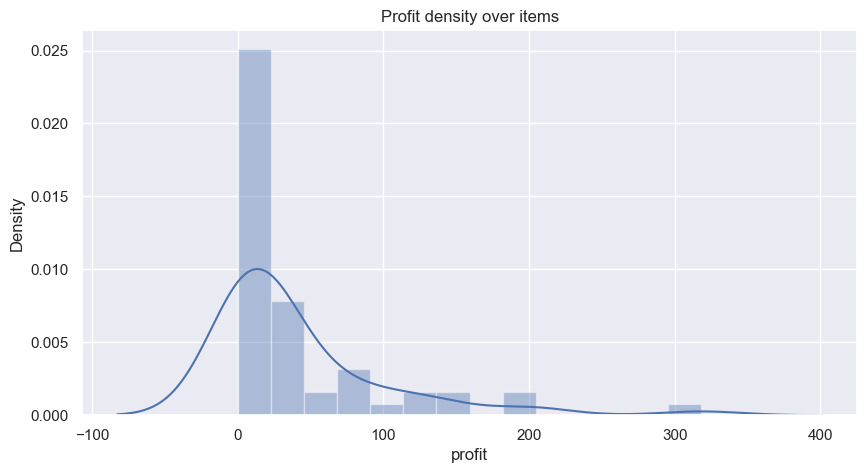

In [53]:
ax = sns.distplot(itemxprofit['profit'], kde=True)
ax.set(title='Profit density over items')


[Text(0.5, 1.0, 'Type and profit')]

) missing from current font.thon/3.7/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.thon/3.7/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


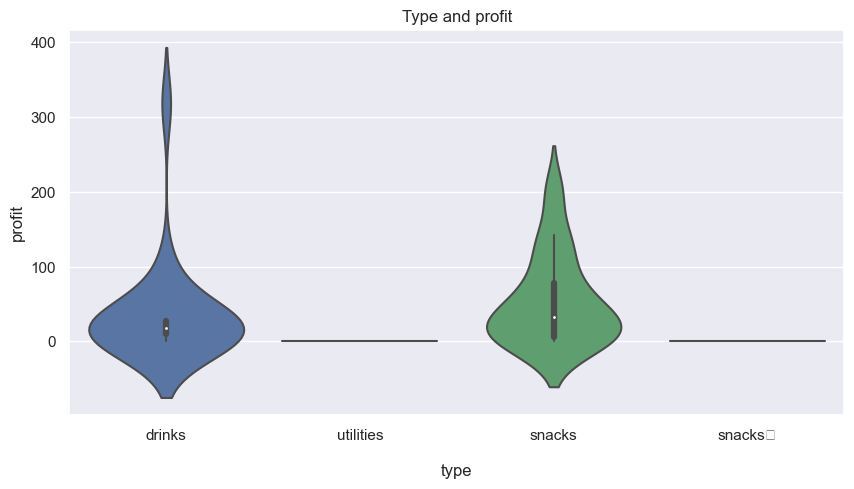

In [54]:
ax = sns.violinplot(x='type',y='profit', data=itemxprofit)
ax.set(title='Type and profit')

In [55]:
#average profit per unit on each day...
import time
from datetime import date
dateplot = t
for index, row in dateplot.iterrows():
    date = row['date']
    date_object = datetime.datetime.strptime(date, '%A, %B %d, %Y')
    dayofweek = date_object.strftime('%A')
    dateplot.loc[index, 'date'] = dayofweek
    
dateplot.groupby(['type','date']).mean()

ID  quantity_bought    revenue    profit
type   date                                                       
drinks Friday     542.200000         1.563636   8.627273  4.052000
       Monday     384.400000         1.250000   7.200000  3.229250
       Thursday   492.000000         2.000000  12.000000  6.700000
       Wednesday  217.344828         1.103448   6.235632  2.914598
snacks Friday     525.928571         1.428571   6.053571  3.446190
       Monday     384.152174         1.581522   8.467391  4.076522
       Thursday   494.500000         1.000000   5.500000  2.185000
       Wednesday  308.111111         1.376543   6.462963  3.225617

[Text(0.5, 1.0, 'Date over days')]

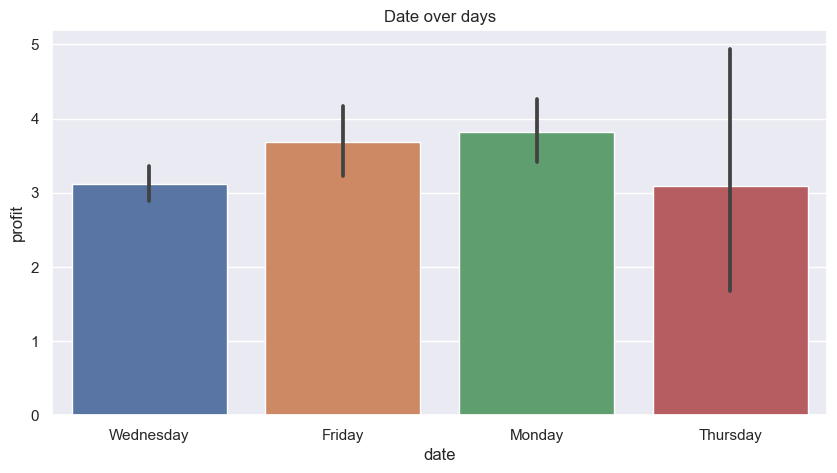

In [56]:
ax =sns.barplot(x='date',y='profit',data=dateplot)
ax.set(title='Date over days')


In [58]:
sns.barplot(x='ID',y='bought',data=itemxprofit)
ax.set(title='Bought')


ValueError: Could not interpret input 'ID'

In [59]:
sns.barplot(x="ID", y="profit", hue='type', data=itemxprofit[itemxprofit.profit.between(50, 40000)])
ax.set(title='Bought vs Profit')


ValueError: Could not interpret input 'ID'

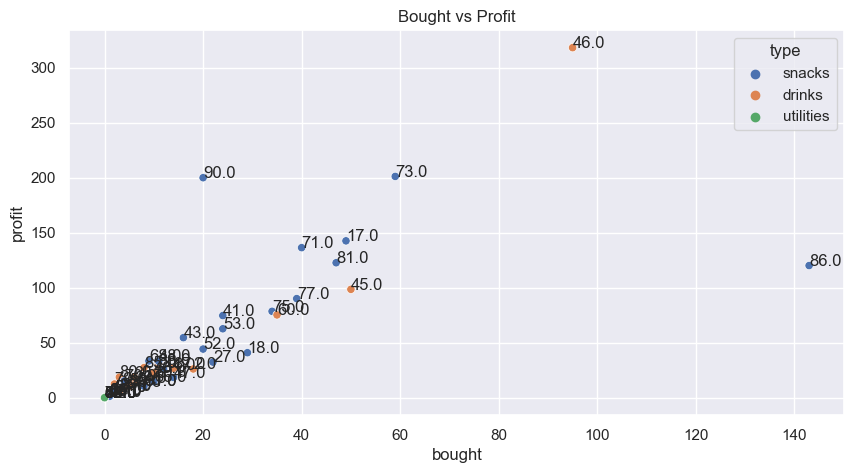

In [ ]:
import matplotlib.pyplot as plt

# plot line graph
ax = sns.scatterplot(x='bought', y='profit',hue='type', data = itemxprofit)
ax.set(title='Bought vs Profit')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(itemxprofit.bought, itemxprofit.profit, itemxprofit.ID, plt.gca())  


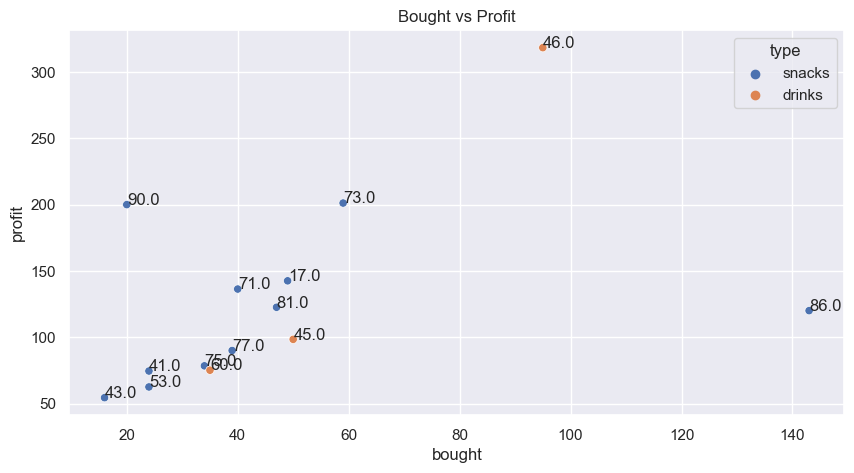

In [ ]:
import matplotlib.pyplot as plt

# plot line graph
ax = sns.scatterplot(x='bought', y='profit',hue='type', data = itemxprofit[itemxprofit.profit.between(50, 40000)])
ax.set(title='Bought vs Profit')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(itemxprofit[itemxprofit.profit.between(50, 40000)].bought, itemxprofit[itemxprofit.profit.between(50, 40000)].profit, itemxprofit[itemxprofit.profit.between(50, 40000)].ID, plt.gca())  


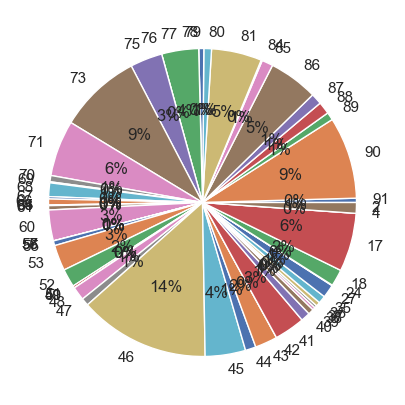

In [ ]:

IDs = itemxprofit.ID.values.tolist()
profita = itemxprofit.profit.values.tolist()


plt.pie(profita, labels = IDs, autopct='%.0f%%')
plt.show()

Training Machine Learning

In [ ]:
itemxprofit.describe()

,ID,price_sold,og_price,profit,bought
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,57.089286,6.750000,3.821786,41.477857,16.678571
std,21.979558,6.226775,4.669173,61.766379,25.362182
min,2.000000,1.000000,0.160000,0.000000,0.000000
25%,42.750000,4.000000,1.590000,2.660000,1.000000
50%,57.500000,5.000000,2.420000,18.440000,8.000000
75%,75.250000,6.250000,4.690000,46.790000,20.500000
max,91.000000,40.000000,29.630000,318.250000,143.000000


In [ ]:
total.describe()

,quantity_bought,rev,profit
count,657.000000,657.000000,657.000000
mean,1.403349,7.215373,3.519513
std,1.359313,7.419463,2.890133
min,1.000000,1.000000,0.840000
25%,1.000000,4.500000,2.150000
50%,1.000000,5.000000,2.910000
75%,1.000000,7.000000,3.410000
max,24.000000,80.000000,29.100000


In [ ]:
correlations_data = itemxprofit.corr()['profit'].sort_values()
correlations_data.head(10)

og_price      0.023207
price_sold    0.063421
ID            0.096812
bought        0.781146
profit        1.000000
Name: profit, dtype: float64

      ID                         date  \
0      8  Wednesday, January 25, 2023   
1      9  Wednesday, January 25, 2023   
2     10  Wednesday, January 25, 2023   
3     11  Wednesday, January 25, 2023   
4     12  Wednesday, January 25, 2023   
..   ...                          ...   
652  707     Monday, February 6, 2023   
653  708     Monday, February 6, 2023   
654  709     Monday, February 6, 2023   
655  710     Monday, February 6, 2023   
656  711     Monday, February 6, 2023   

                                           item  quantity_bought      time  \
0    Hortex Blackberry 300ml (Czarna Porzeczka)              1.0   12 : 3    
1         Nestle Whole Grain with Chocolate 23g              5.0   12 : 5    
2       Oshee Vitamin Mineral Dragonfruit 555ml              0.0  12 : 15    
3                     Lajkonik Pretzel Crackers              0.0  12 : 15    
4                               Ginger shot 50g              2.0  12 : 16    
..                                     